In [53]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [54]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [55]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from datetime import datetime, timedelta


In [56]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [57]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with = engine)


In [58]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [59]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station


In [60]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [61]:
# Find the most recent date in the dataset.
session.query(func.max(Measurement.date)).scalar()

'2017-08-23'

In [66]:
# Sort the dataframe by date
df_sorted = df.sort_values('Date')
df_sorted

,Date,Precipitation
0,2016-08-24,2.0
1,2016-08-24,54.6
2,2016-08-24,57.9
3,2016-08-24,NaN
4,2016-08-24,31.0
...,...,...
2218,2017-08-22,12.7
2219,2017-08-23,0.0
2220,2017-08-23,0.0
2221,2017-08-23,2.0


<Figure size 1000x600 with 0 Axes>

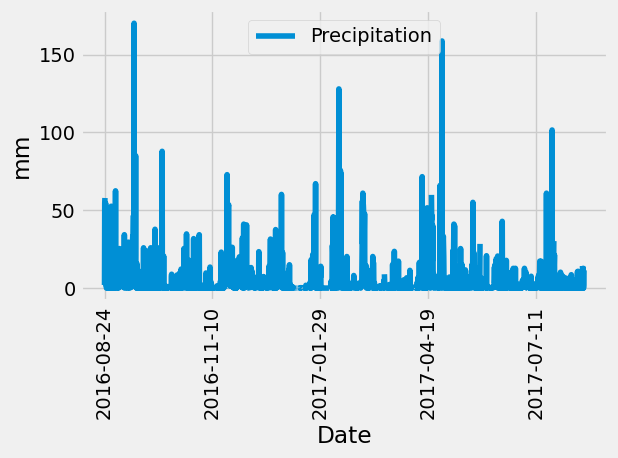

In [77]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date = datetime.strptime(most_recent_date, '%Y-%m-%d')
one_year_ago = most_recent_date - timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
                      filter(Measurement.date >= one_year_ago).\
                      order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Set the index of the DataFrame to the "Date" column
df.set_index('Date', inplace=True)

# Sort the DataFrame by "Date"
df.sort_index(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
df.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('mm')
plt.xticks(rotation=90) 
plt.tight_layout()


In [25]:
# Use Pandas to calculate the summary statistics for the precipitation data
# Calculate summary statistics
summary_statistics = df['Precipitation'].describe()

# Convert summary statistics to a DataFrame
summary_statistics_df = pd.DataFrame(summary_statistics)
summary_statistics_df

,Precipitation
count,2015.000000
mean,4.485112
std,11.690532
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [31]:
# Design a query to calculate the total number of stations
session.query(func.count(Station.station)).scalar()

9

In [40]:
# Design a query to find the most active stations 
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                  group_by(Measurement.station).\
                  order_by(func.count(Measurement.station).desc()).all()

# List the stations and their counts in descending order.
for station, count in active_stations:
    print(station, count)

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [41]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Get the most active station ID from the previous query
most_active_station_id = active_stations[0][0]

# Query to calculate the lowest, highest, and average temperature for the most active station
temperature_stats = session.query(func.min(Measurement.tobs),
                                  func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs)).\
                     filter(Measurement.station == most_active_station_id).all()

# Print the result
print(temperature_stats)

[(12.2, 29.4, 22.03582251082252)]


Text(0, 0.5, 'Frequency')

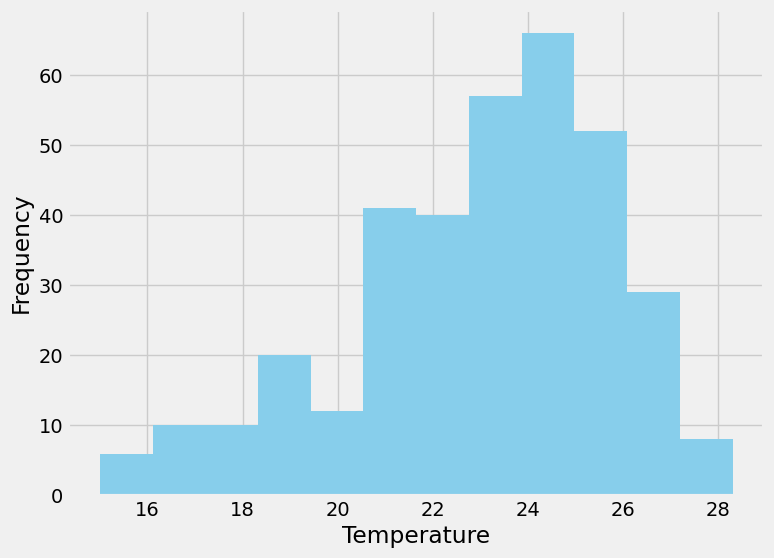

In [52]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Calculate the date 12 months from the most recent date
most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date = datetime.strptime(most_recent_date, '%Y-%m-%d')
one_year_ago = most_recent_date - timedelta(days=365)

# Query temperature observation data for the most active station within the last 12 months
temperature_data = session.query(Measurement.tobs).\
                   filter(Measurement.station == most_active_station_id).\
                   filter(Measurement.date >= one_year_ago).all()

# Extract temperature observations from the query results
temperatures = [temp[0] for temp in temperature_data]

# Plot the temperature observations as a histogram
plt.figure(figsize=(8, 6))
plt.hist(temperatures, bins =12, color='skyblue', label = 'tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')


# Close Session

In [16]:
# Close Session
session.close()
